<blockquote>
    <h1>Exercise 7.10</h1>
    <p>This question relates to the <code>College</code> data set.</p>
    <ol>
        <li>Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.</li>
        <li>Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.</li>
        <li>Evaluate the model obtained on the test set, and explain the results obtained.</li>
        <li>For which variables, if any, is there evidence of a non-linear relationship with the response?</li>
    </ol>
</blockquote>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# https://stackoverflow.com/questions/34398054/ipython-notebook-cell-multiple-outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import itertools
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from pygam import LinearGAM, s

In [2]:
def fit_linear_reg(df_X, df_Y):
    # Fit linear regression model and return RSS values
    model = sm.OLS(df_Y, df_X)
    fitted = model.fit()
    RSS = fitted.ssr
    return RSS

In [3]:
df = pd.read_csv("../../DataSets/College/College.csv")
df = df.set_index('Unnamed: 0')
df.index.names = ['College names']
df['Private'] = np.where(df['Private'] == 'Yes', 1, 0)  # convert categorical variable to quantative variable
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College names,,,,,,,,,,,,,,,,,,
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


<h3>Exercise 7.10.1</h3>
<blockquote>
    <i>Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.</i>
</blockquote>

In [4]:
df_x = df.drop('Outstate', 1)
df_y = df[['Outstate']]
df_x.insert(0, 'Intercept', 1)

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

,variables,RSS
number of predictors,,
0,[Intercept],1.25593e+10
1,"[Intercept, Expend]",6.87457e+09
2,"[Intercept, Private, Expend]",4.94382e+09
3,"[Intercept, Private, Room.Board, Expend]",3.98629e+09
4,"[Intercept, Private, Room.Board, perc.alumni, ...",3.52653e+09
5,"[Intercept, Private, Room.Board, PhD, perc.alu...",3.30277e+09
6,"[Intercept, Private, Room.Board, PhD, perc.alu...",3.17349e+09
7,"[Intercept, Private, Room.Board, Personal, PhD...",3.14149e+09
8,"[Intercept, Private, Room.Board, Personal, PhD...",3.11453e+09


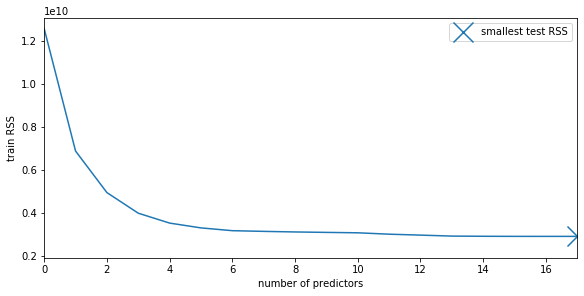

In [5]:
# forward stepwise selection
RSS = fit_linear_reg(df_x[['Intercept']], df_y)
best_submodels = {
    0: (['Intercept'], RSS),  # null model
}
best_features_set = {'Intercept'}

features_lst = df_x.columns.tolist()[1:] # excluding intercept; necessary for all combinations
p = df_x.shape[1] - 1
for k in range(1, p+1):
    RSS_min_subset = float('+inf')
    descriptiveColumns_best_subset = None
    for descriptiveColumns in itertools.combinations(features_lst, k):
        descriptiveColumns = ['Intercept'] + list(descriptiveColumns) 
        if not best_features_set.issubset(set(descriptiveColumns)):
            continue
            
        RSS = fit_linear_reg(df_x[descriptiveColumns], df_y)
        if RSS < RSS_min_subset:
            RSS_min_subset = RSS
            descriptiveColumns_best_subset = descriptiveColumns
          
    best_submodels[k] = (descriptiveColumns_best_subset, RSS_min_subset)
    
    difference_ = set(descriptiveColumns_best_subset) - best_features_set # Return a set that contains the items that only exist in set set(descriptiveColumns_best_subset), and not in set best_features_set
    assert len(difference_) == 1, f'difference_ = {difference_}'
    best_feature = list(difference_)[0]
    best_features_set.add(best_feature)        
    
df_best_submodels = pd.DataFrame(best_submodels, index=['variables', 'RSS']).T
df_best_submodels.index.name = 'number of predictors'
df_best_submodels

# df_best_submodels
df_best = df_best_submodels[df_best_submodels['RSS'] == df_best_submodels['RSS'].min()]

fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))

_ = df_best_submodels['RSS'].plot(ax=ax1, label='')
_ = ax1.scatter(x=df_best.index[0], y=df_best['RSS'].iloc[0], marker='x', s=400, label='smallest test RSS')
_ = ax1.set_ylabel(r'train RSS')
_ = ax1.legend()

,variables,training RSS,testing RSS
number of predictors,,,
0,[Intercept],1.25593e+10,2.74288e+09
1,"[Intercept, Expend]",6.87457e+09,1.42103e+09
2,"[Intercept, Private, Expend]",4.94382e+09,1.0219e+09
3,"[Intercept, Private, Room.Board, Expend]",3.98629e+09,8.07874e+08
4,"[Intercept, Private, Room.Board, perc.alumni, ...",3.52653e+09,7.79654e+08
5,"[Intercept, Private, Room.Board, PhD, perc.alu...",3.30277e+09,7.27947e+08
6,"[Intercept, Private, Room.Board, PhD, perc.alu...",3.17349e+09,6.83546e+08
7,"[Intercept, Private, Room.Board, Personal, PhD...",3.14149e+09,6.78959e+08
8,"[Intercept, Private, Room.Board, Personal, PhD...",3.11453e+09,6.78883e+08


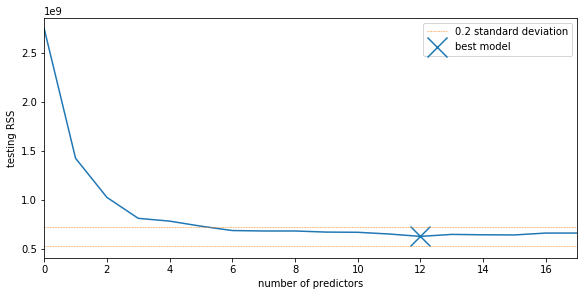

In [6]:
for k, (descriptiveColumns_best_subset, RSS_train) in best_submodels.items():
    if descriptiveColumns_best_subset == ['Intercept']:  # null model
        Y_test_mean = df_y_train.mean().iloc[0]
        RSS_test = ((df_y_test - Y_test_mean)**2).sum().iloc[0]
        best_submodels[k] = (descriptiveColumns_best_subset, RSS_train, RSS_test)
        continue

    
    model = sm.OLS(df_y_train, df_x_train[descriptiveColumns_best_subset])
    fitted = model.fit()
    sr_y_pred = fitted.predict(df_x_test[descriptiveColumns_best_subset])
    RSS_test = ((df_y_test['Outstate'] - sr_y_pred)**2).sum()
    best_submodels[k] = (descriptiveColumns_best_subset, RSS_train, RSS_test)


df_best_submodels = pd.DataFrame(best_submodels, index=['variables', 'training RSS', 'testing RSS']).T
df_best_submodels.index.name = 'number of predictors'
df_best_submodels

# df_best_submodels
df_best_MSE = df_best_submodels[df_best_submodels['testing RSS'] == df_best_submodels['testing RSS'].min()]
fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))

_ = df_best_submodels['testing RSS'].plot(ax=ax1, label='')
_ = ax1.scatter(x=df_best_MSE.index[0], y=df_best_MSE['testing RSS'].iloc[0], marker='x', s=400, label='best model')

std_dev = df_best_submodels['testing RSS'].std(ddof=0)
min_val_2std = df_best_MSE['testing RSS'].iloc[0] - 0.2*std_dev
_ = ax1.axhline(y=min_val_2std, linestyle='dashed', linewidth=0.5, c=plt.rcParams['axes.prop_cycle'].by_key()['color'][1], label='0.2 standard deviation')
_ = ax1.axhline(y=df_best_MSE['testing RSS'].iloc[0] + 0.2*std_dev, linestyle='dashed', linewidth=0.5, c=plt.rcParams['axes.prop_cycle'].by_key()['color'][1])

_ = ax1.set_ylabel('testing RSS')
_ = ax1.legend()

<h3>Exercise 7.10.2</h3>
<blockquote>
    <i>Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.</i>
</blockquote>

<p>Based on the previous results, we select $\mathrm{Private}$, $\mathrm{Room.Board}$, $\mathrm{PhD}$, $\mathrm{perc.alumni}$, $\mathrm{Expend}$ and $\mathrm{Grad.Rate}$ as predictors</p>

In [7]:
no_of_predictors = 6
features_lst = df_best_submodels['variables'].iloc[no_of_predictors].copy()

In [8]:
features_lst.remove('Intercept')
features_lst

['Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

In [9]:
gam = LinearGAM().gridsearch(df_x_train[features_lst].to_numpy(), df_y_train.to_numpy())
Y_pred = gam.predict(df_x_test[features_lst])
RSS_test = ((df_y_test['Outstate'] - Y_pred)**2).sum()
print(f'RSS_test = {RSS_test}\n')

100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01


RSS_test = 568773456.286207



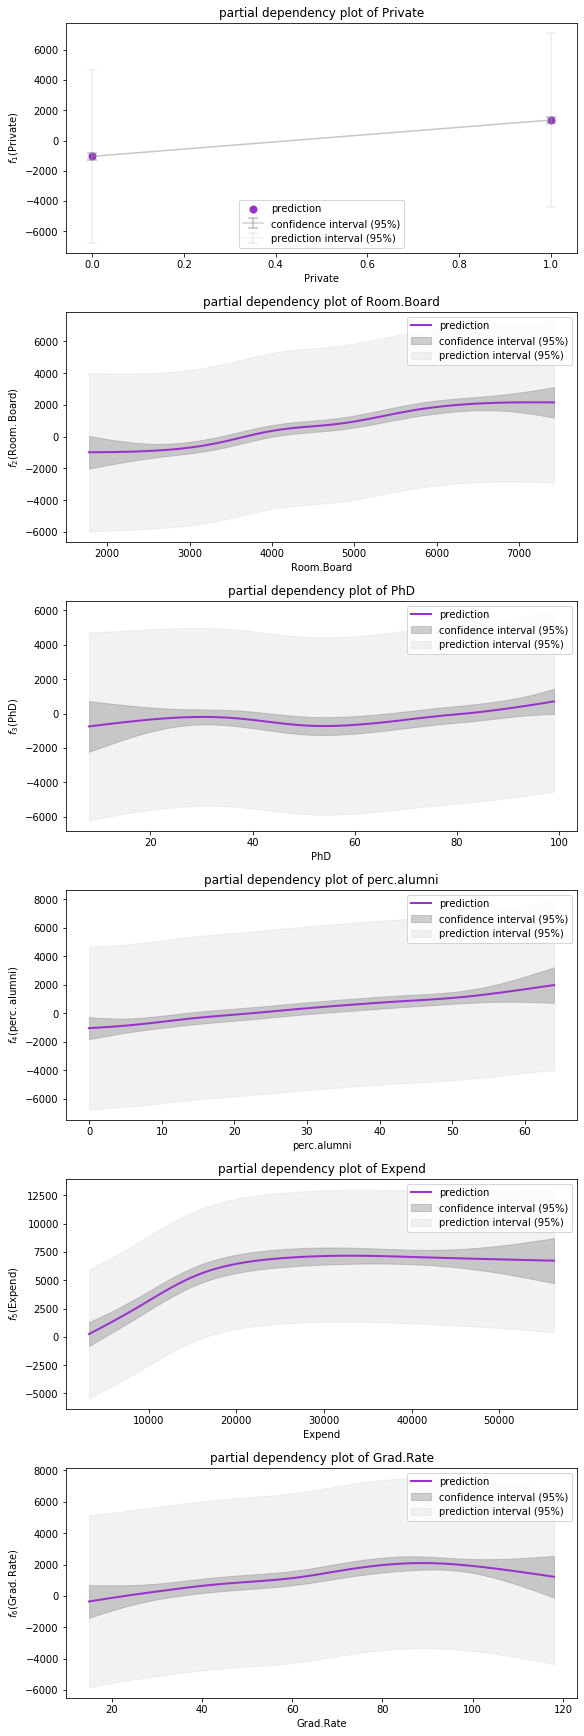

In [10]:
# partial dependency plots of best model with full dataset
columns = features_lst
numberOfSubplots = no_of_predictors
confidence_width = 0.95
fig, axes = plt.subplots(numberOfSubplots, 1, constrained_layout=True, figsize=(8, 4*numberOfSubplots))
for i, ax in enumerate(axes):
    if i == 0:
        # because 'Private' is a categorical variable
        X_pred = gam.generate_X_grid(term=i, n=2)
        X_pred[:, i] = np.array([0, 1])
    else:
        X_pred = gam.generate_X_grid(term=i)
    
    Y_pred = gam.predict(X_pred)
    
    partial_dependence, confidence_intervals = gam.partial_dependence(term=i, X=X_pred, width=confidence_width)
    lower_conf_int = confidence_intervals[:, 0]
    upper_conf_int = confidence_intervals[:, 1]

    diff = Y_pred[0] - partial_dependence[0]
    partial_dependence += diff
    lower_conf_int += diff
    upper_conf_int += diff
    
    prediction_intervals = gam.prediction_intervals(X_pred, width=confidence_width)
    lower_pred_int = prediction_intervals[:, 0]
    upper_pred_int = prediction_intervals[:, 1]
    
#     _ = ax.scatter(df_x[columns[i]], df_y, label='training data', s=0.5)
    if i == 0:
        _ = ax.scatter(X_pred[:, i], partial_dependence, color='darkorchid', linewidth=2, label='prediction')
        _ = ax.errorbar(X_pred[:, i], partial_dependence, partial_dependence - lower_conf_int, 
                        capsize=5, elinewidth=2, markeredgewidth=2,
                        color='#888888', alpha=0.4, label=f"confidence interval ({int(confidence_width*100)}%)")
        _ = ax.errorbar(X_pred[:, i], partial_dependence, partial_dependence - lower_pred_int, 
                        capsize=5, elinewidth=2, markeredgewidth=2,
                        color='#888888', alpha=0.1, label=f"prediction interval ({int(confidence_width*100)}%)")
    else:    
        _ = ax.plot(X_pred[:, i], partial_dependence, '-', color='darkorchid', linewidth=2, label='prediction')
        _ = ax.fill_between(X_pred[:, i], lower_conf_int, upper_conf_int, color='#888888', alpha=0.4, label=f"confidence interval ({int(confidence_width*100)}%)")
        _ = ax.fill_between(X_pred[:, i], lower_pred_int, upper_pred_int, color='#888888', alpha=0.1, label=f"prediction interval ({int(confidence_width*100)}%)")

    _ = ax.legend()
    _ = ax.set_xlabel(columns[i])
    _ = ax.set_ylabel(r'$f_{%s}(\mathrm{%s})$' % (i+1, columns[i]))
    _ = ax.set_title(f'partial dependency plot of {columns[i]}')

<h3>Exercise 7.10.3</h3>
<blockquote>
    <i>Evaluate the model obtained on the test set, and explain the results obtained.</i>
</blockquote>

In [11]:
features_lst

['Private', 'Room.Board', 'PhD', 'perc.alumni', 'Expend', 'Grad.Rate']

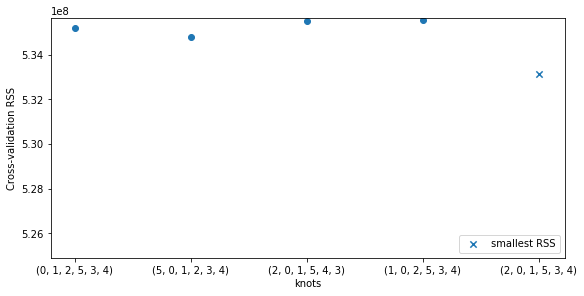

In [12]:
perm_splines = itertools.permutations(list(range(4, 10)), no_of_predictors) 
results = {}
for n_splines in perm_splines:
    # https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f
    # fit a spline term on feature 0, 1 and 2
    gam = LinearGAM(s(0, dtype='categorical') + s(1) + s(2) + s(3) + s(4) + s(5), n_splines=n_splines, fit_intercept=True,
                    lam=0, constraints=None).fit(df_x_train[features_lst].to_numpy(), df_y_train.to_numpy())
    Y_pred = gam.predict(df_x_test[features_lst])
    RSS_test = ((df_y_test['Outstate'] - Y_pred)**2).sum()
    n_knots = tuple(splines-4 for splines in n_splines)
    results[str(n_knots)] = RSS_test

n_knots_arr = np.array(list(results.keys()))
RSS_arr = np.array(list(results.values()))

# plot best 'k' models
k = 5
idx = np.argpartition(RSS_arr, k)
n_knots_arr = n_knots_arr[idx[:k]]
RSS_arr = RSS_arr[idx[:k]]
std_dev = np.std(RSS_arr)

id_min = np.argmin(RSS_arr)
min_RSS = n_knots_arr[id_min]  # we plot these 'best results' with a different marker
min_val = RSS_arr[id_min]  # we plot these 'best results' with a different marker
n_knots_arr = np.delete(n_knots_arr, id_min)
RSS_arr = np.delete(RSS_arr, id_min)

fig, ax1 = plt.subplots(1, 1, constrained_layout=True, figsize=(8, 4))
_ = ax1.scatter(n_knots_arr, RSS_arr)
_ = ax1.scatter(min_RSS, min_val, marker='x', s=40, c=plt.rcParams['axes.prop_cycle'].by_key()['color'][0], label='smallest RSS')
_ = ax1.set_xlabel(r'knots')
_ = ax1.set_ylabel('Cross-validation RSS')
_ = ax1.legend(loc=4)
_ = ax1.set_ylim(ymin = min_val_2std - (min_val_2std % 1))

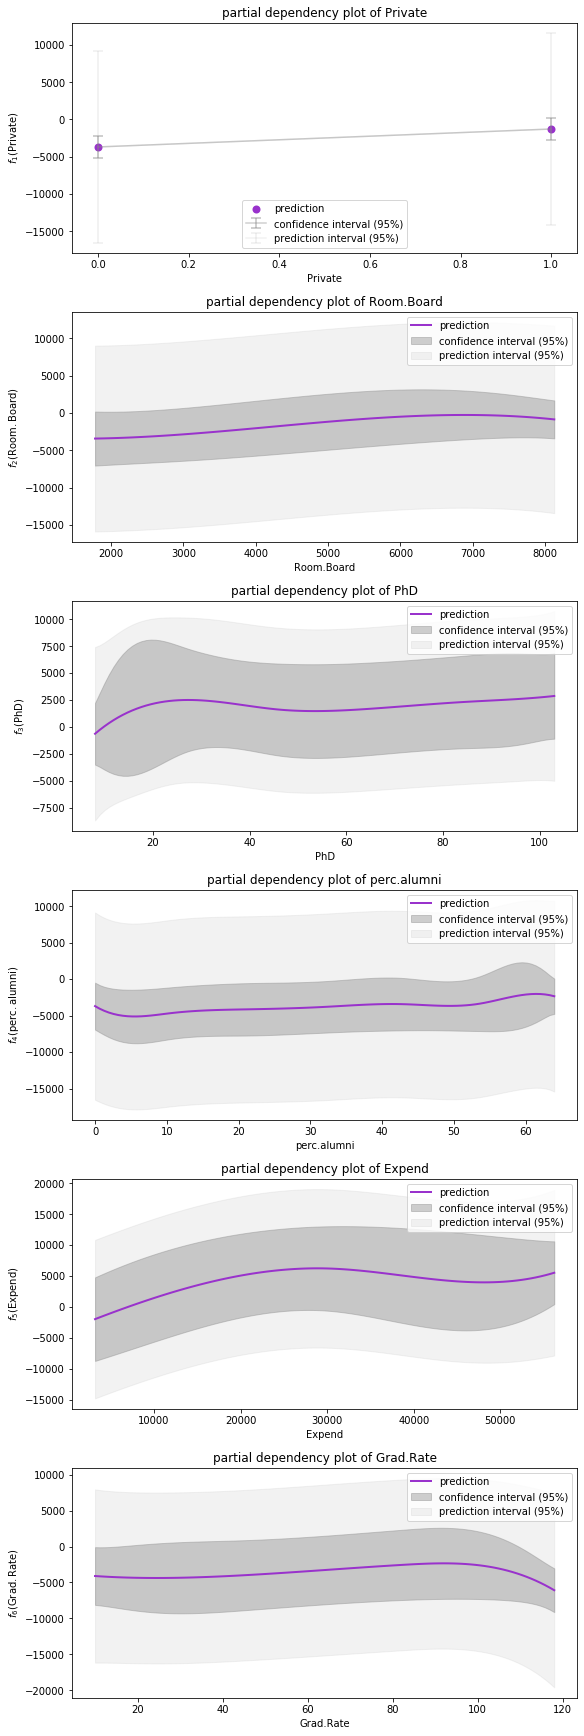

In [13]:
# partial dependency plots of best model with full dataset
n_knots = [3, 0, 4, 5, 1, 2]
n_splines = [el + 4 for el in n_knots]

gam = LinearGAM(s(0, dtype='categorical') + s(1) + s(2) + s(3) + s(4) + s(5), n_splines=n_splines, fit_intercept=True,
                    lam=0, constraints=None).fit(df_x[features_lst].to_numpy(), df_y.to_numpy())
columns = features_lst
numberOfSubplots = no_of_predictors
confidence_width = 0.95
fig, axes = plt.subplots(numberOfSubplots, 1, constrained_layout=True, figsize=(8, 4*numberOfSubplots))
for i, ax in enumerate(axes):
    if i == 0:
        # because 'Private' is a categorical variable
        X_pred = gam.generate_X_grid(term=i, n=2)
        X_pred[:, i] = np.array([0, 1])
    else:
        X_pred = gam.generate_X_grid(term=i)
    
    Y_pred = gam.predict(X_pred)
    
    partial_dependence, confidence_intervals = gam.partial_dependence(term=i, X=X_pred, width=confidence_width)
    lower_conf_int = confidence_intervals[:, 0]
    upper_conf_int = confidence_intervals[:, 1]

    diff = Y_pred[0] - partial_dependence[0]
    partial_dependence += diff
    lower_conf_int += diff
    upper_conf_int += diff
    
    prediction_intervals = gam.prediction_intervals(X_pred, width=confidence_width)
    lower_pred_int = prediction_intervals[:, 0]
    upper_pred_int = prediction_intervals[:, 1]
    
#     _ = ax.scatter(df_x[columns[i]], df_y, label='training data', s=0.5)
    if i == 0:
        _ = ax.scatter(X_pred[:, i], partial_dependence, color='darkorchid', linewidth=2, label='prediction')
        _ = ax.errorbar(X_pred[:, i], partial_dependence, partial_dependence - lower_conf_int, 
                        capsize=5, elinewidth=2, markeredgewidth=2,
                        color='#888888', alpha=0.4, label=f"confidence interval ({int(confidence_width*100)}%)")
        _ = ax.errorbar(X_pred[:, i], partial_dependence, partial_dependence - lower_pred_int, 
                        capsize=5, elinewidth=2, markeredgewidth=2,
                        color='#888888', alpha=0.1, label=f"prediction interval ({int(confidence_width*100)}%)")
    else:    
        _ = ax.plot(X_pred[:, i], partial_dependence, '-', color='darkorchid', linewidth=2, label='prediction')
        _ = ax.fill_between(X_pred[:, i], lower_conf_int, upper_conf_int, color='#888888', alpha=0.4, label=f"confidence interval ({int(confidence_width*100)}%)")
        _ = ax.fill_between(X_pred[:, i], lower_pred_int, upper_pred_int, color='#888888', alpha=0.1, label=f"prediction interval ({int(confidence_width*100)}%)")

    _ = ax.legend()
    _ = ax.set_xlabel(columns[i])
    _ = ax.set_ylabel(r'$f_{%s}(\mathrm{%s})$' % (i+1, columns[i]))
    _ = ax.set_title(f'partial dependency plot of {columns[i]}')

<h3>Exercise 7.10.</h3>
<blockquote>
    <i>For which variables, if any, is there evidence of a non-linear relationship with the response?</i>
</blockquote>

In [14]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                        29.0
Link Function:                     IdentityLink Log Likelihood:                                -12440.2248
Number of Samples:                          777 AIC:                                            24940.4496
                                                AICc:                                           24942.9429
                                                GCV:                                          3839847.0356
                                                Scale:                                        3582769.5554
                                                Pseudo R-Squared:                                   0.7866
Feature Function                  Lam

/home/floris/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


<p>Unfortunately, as the output shows, we cannot rely on the $p$ values shown in the summary due to a known bug in the <code>pygam</code> library.</p>